## Decison Trees
- Using weight, age and Height to determine clothing size

In [3]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 
import matplotlib.pyplot as plt

In [4]:
data_import  = pd.read_csv("final_test.csv")
data_import

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [5]:
data_import["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

### Data Preparation
- Remove NA 

In [6]:
data_step_one = data_import.copy()
data_step_one = data_step_one.dropna(axis=0)

dropped_rows = len(data_import) - len(data_step_one)
print("Rows Dropped: ", dropped_rows)

Rows Dropped:  581


In [7]:
# Drop XXL records coz there too small
data_step_one = data_step_one[data_step_one["size"] != "XXL"]
data_step_one

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [8]:
# Split the data

X = data_step_one[["weight", "age", "height"]]
y =data_step_one["size"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
# Modeling

def decision_tree_run(depth=3):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    return tree_clf.score(X_test, y_test)

decision_tree_run(None)

0.5020357270090081

In [11]:
# Create number of trees, depth and parameters
accuracy = []
tree_depth = list(range(2, 100, 3))

In [12]:
for i in tree_depth:
    accuracy.append(decision_tree_run(i))
accuracy

[0.44661305918876276,
 0.5040714540180162,
 0.5152170593923355,
 0.5162603694844521,
 0.5079647819227442,
 0.5037406483790524,
 0.5021120667718459,
 0.5020102804213955,
 0.5017303679576569,
 0.5019339406585577,
 0.5018576008957198,
 0.5019339406585577,
 0.5019339406585577,
 0.5018830474833325,
 0.5020102804213955,
 0.5018830474833325,
 0.5020102804213955,
 0.5020866201842333,
 0.5018067077204946,
 0.5019339406585577,
 0.5018576008957198,
 0.5020357270090081,
 0.5019593872461703,
 0.5020102804213955,
 0.5019593872461703,
 0.5018321543081072,
 0.5020866201842333,
 0.5019339406585577,
 0.5018321543081072,
 0.5019848338337829,
 0.5019593872461703,
 0.5019339406585577,
 0.5019339406585577]

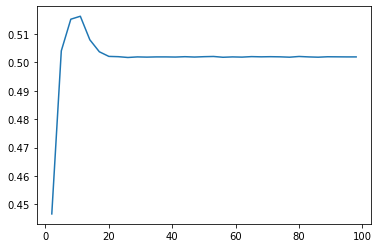

In [13]:
plt.plot(tree_depth, accuracy)

In [24]:
# Evaluation
tree_clf=DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

tree_clf_view = export_graphviz(
    tree_clf, 
    out_file="clothes_tree.dot",
    feature_names = X_train.columns, 
    rounded= True, 
    filled=True
)


In [29]:
results = pd.DataFrame(data = {"Predictions": tree_clf.predict(X_test).tolist(), "Actuals": y_test.tolist()})
results["Matching"] = results.apply(lambda x: "Correct" if x["Predictions"] == x["Actuals"] else "Wrong", axis=1)
results

,Predictions,Actuals,Matching
0,XL,XL,Correct
1,M,XXXL,Wrong
2,XL,XL,Correct
3,M,L,Wrong
4,XXXL,XXXL,Correct
...,...,...,...
39293,XXXL,XXXL,Correct
39294,XL,XXXL,Wrong
39295,M,M,Correct
39296,S,XXS,Wrong


In [38]:
# TODO 

correct_wrong_data = results.groupby(["Actuals", "Matching"])["Predictions"].count().reset_index(name="count")
correct_wrong_data["Labels"] = correct_wrong_data["Actuals"] + " - " + correct_wrong_data["Matching"]
correct_wrong_data["Colors"]  = correct_wrong_data["Matching"].map(lambda x: "b" if x == x["Correct"])
correct_wrong_data

In [ ]:
plt.figure(figsize=(18, 6))
fig = plt.bar(x = correct_wrong_data["Labels"], height=correct_wrong_data["Prediction"])
fig

In [ ]:
confusion_matrix(y_test, tree_clf.predict(X_test).tolist(), labels = y_test.unique())

In [ ]:
plot_confusion_matrix(tree_clf, X_test, y_test)